<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac5_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import timeit

# Tensor
## Tensor in tensorflow support eagar execution and graph execution.
## In graph execution, a computation graph is created for later evaluation


In [ ]:
a = tf.constant([[1, 3.0], [3.0, 1]])
b = tf.constant([[1.0, 1], [1, 1]])
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

### as you can see type of tensor it is in eager mode

In [ ]:
type(a)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(b)

tensorflow.python.framework.ops.EagerTensor

# In tensorflow *tf.function* is common way define graphs


## *tf.function* creates callable that executes graphs
## grpah are extermely useful and run faster, efficiently and on run on multiple devices

In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 3.],
       [3., 1.]], dtype=float32)>

In [ ]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

### define a function

In [ ]:
def execution_fun(x, y):
  z = tf.matmul(x, y)
  z = z + tf.constant(2.0)
  return z

### create function object that contains graph

In [ ]:
a_fun = tf.function(execution_fun)

### executing with graph mode

In [ ]:
timeit.timeit(lambda: a_fun(a, b), number=100)

0.11203651399955561

###executing with eager mode

In [ ]:
timeit.timeit(lambda: execution_fun(a, b), number=100)

0.008310146999065182

### above we can see that eager mode is taking less time
### but for many layers in model it will take less time as compare to eager mode

In [ ]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    # Add a lot of small layers
    num_layers = 1000
    self.my_layers = [tf.keras.layers.Dense(64, activation="relu")
                      for n in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    for layer in self.my_layers:
      x = layer(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

In [ ]:
input_data = tf.random.uniform([100, 28, 28])

In [ ]:
eager_model = SequentialModel()

# Don't count the time for the initial build.
eager_model(input_data)
print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=100))

Eager time: 20.266556350999963


In [ ]:
print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=100))

Eager time: 20.364811526000267


In [ ]:
graph_model = SequentialModel()
graph_model.call = tf.function(graph_model.call)

# Don't count the time for the initial build and trace.
graph_model(input_data)
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=100))

Graph time: 2.776997308999853


In [ ]:
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=100))

Graph time: 2.7888064760009


In [ ]:
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=100))

Graph time: 2.717407947000538


In [ ]:
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=100))

Graph time: 2.802857902001051


In [ ]:
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=100))

Graph time: 2.7655795900009252


### *tf.function* also traces any python function it calls

In [ ]:
@tf.function
def graph_to_func():
  x = a
  y = b
  return execution_fun(x, y)

In [ ]:
timeit.timeit(lambda: graph_to_func(), number=100)

0.09431496599972888

In [ ]:
def fab_series(n):
  def fab(n):
    # if(n == 0):
    #   return 0
    # if(n == 1):
    #   return 1
    # return fab(n-1) + fab(n-2)
    return 0 if n == 0 else 1 if n == 1 else fab(n-1) + fab(n-2)
  fabs = list()
  for i in range(n):
    fabs.append(fab(i))
  return fabs

fab_series(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [ ]:
v = tf.Variable(0)
@tf.function
def fab_series_g(n):
  def fab(n):
    return 0 if n == 0 else 1 if n == 1 else fab(n-1) + fab(n-2)
  
  st = tf.TensorArray(tf.int32, 0, dynamic_size=True)
  for i in range(n):
     st = st.write(i, fab(i))
  return st.stack()

fab_series_g(10)


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  1,  1,  2,  3,  5,  8, 13, 21, 34], dtype=int32)>

In [ ]:
v = tf.Variable(0)
@tf.function
def fab_series2_g(n):  
  st = tf.TensorArray(tf.int32, 0, dynamic_size=True)
  for i in range(n):
     st = st.write(i, v.assign_add(i))
  
  return st.stack()

fab_series2_g(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)>

In [ ]:
timeit.timeit(lambda: fab_series2_g(10), number=100 )

0.042450536999240285

In [ ]:
timeit.timeit(lambda: fab_series2_g(10), number=100 )

0.0437701789996936

# Solving Machine Learning Problems

In [ ]:
import matplotlib.pyplot as plt


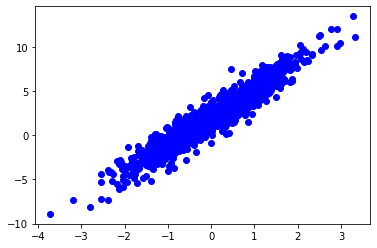

In [ ]:
w = 3.0
b = 2.0

x = tf.random.normal([1000], dtype=tf.float16)
noise = tf.random.normal([1000], dtype=tf.float16)

y = x * w + b + noise

plt.scatter(x, y, c="b")
# plt.plot(x, y, c="r")
plt.show()

In [ ]:
class Model(tf.Module):
  def __init__(self, *kwargs):
    super().__init__(*kwargs)
  @tf.function
  def __call__(self, x):
    w = tf.random.normal([x.shape[-1], x.shape[-1] + 100], dtype=tf.float64)
    b = tf.random.normal([x.shape[0], 1], dtype=tf.float64)
    return tf.matmul(x, w) + b

In [ ]:
m = Model()

In [ ]:
x = tf.random.normal([9000, 1000], dtype=tf.float64)

In [ ]:
timeit.timeit(lambda: m(x), number=100)

67.4734651710005

In [ ]:
m.__call__ = tf.function(m.__call__)
timeit.timeit(lambda: m(x).numpy(), number=100)

71.05285244800143